<a href="https://colab.research.google.com/github/JOSEPHINEGEND/A-Python-Project-Predicting-the-results-of-a-football-game/blob/master/A_Python_Project_Predicting_the_Results_of_a_Football_Game_(APPROACH_3_INCLUDED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Python Project: Predicting the Results of a Football Game.

# 1.1 Introduction
 * Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.

 * The men's FIFA World Ranking is a ranking system for men's national teams in association football.    
 * Currently led by Belgium
 
 * A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.
 
 

## 1.1.1 Defining the Question

* In this project I will be acting as a football analyst in Mchezopesa Ltd company to :

* Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (including rank of the respective team).

## 1.1.2 Metrics for Success
 * Optimal and reliable prediction Model:
    * About 80% Accuracy score and above
    * With the least RMSE score achievable
    

## 1.1.3 The Context

The FIFA/Coca-Cola World Ranking is was developed by FIFA and named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.



## 1.1.4 Experimental design taken

- Perform your EDA
- Perform any necessary feature engineering
- Check of multicollinearity
- Building a model
    * Approach 1: Polynomial regression model
    
        * Model 1: Predict how many goals the home team scores
        * Model 2: Predict how many goals the away team scores

    * Approach 2: Logistic regression model
    
         * Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

    * Approach 3: Ridge, Lasso, & Elastic Net Regression models
    
        * Predict the rank of the teams and compare the models.
        * Use the collinearity analysis to inform the features you use in your models

       
- Cross-validate the model
- Compute RMSE
- Create residual plots for the model
- Assess Heteroscedasticity using Bartlett’s test
- Challenge the solution.

- Create a dashboard that communicates the findings.



## 1.1.5 Appropriateness of the available Data

Two datasets are available:

* Ranking dataset: contains the team ranks from 1993 to 2018

* Results dataset: contains matches and the team scores since 1892 to 2019

The link to the dataset is:

* https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc


# 1.2 Importing Libraries we will use for our Analysis

In [0]:
# Importing Libraries we use for our analysis

import pandas as pd
import numpy as np
import scipy as sp


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn import metrics


from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import pandas_profiling as pp


In [187]:
!pip install pydataset
from pydataset import data 

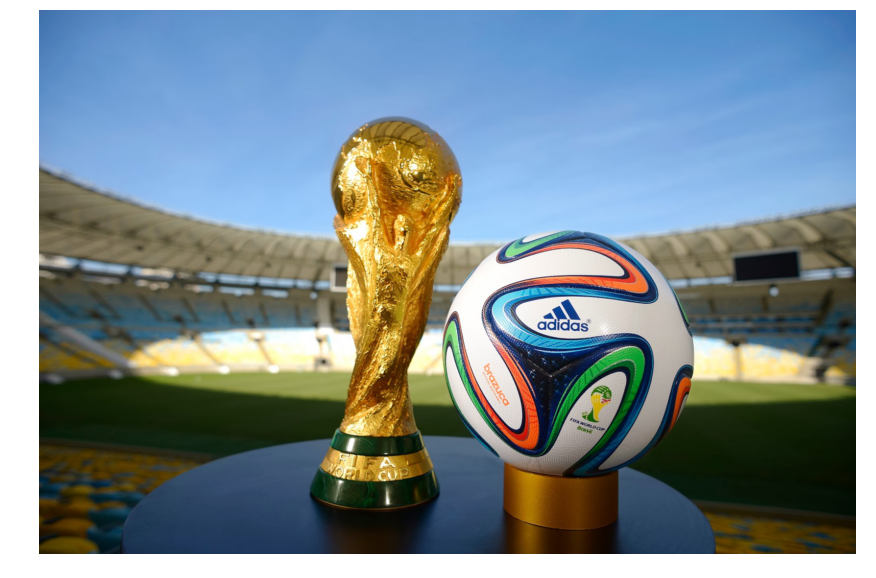

In [0]:

from PIL import  Image # Includes functions to load images from files, and to create new images

plt.figure(figsize=(15,10))
img = np.array(Image.open("/content/the-wc.jpeg"))
plt.imshow(img,interpolation="bilinear") # Displays an image
plt.axis("off")
plt.show()

# 1.3 Viewing our Datasets

In [0]:
# Reading the datasets
rank = pd.read_csv('fifa_ranking.csv')
result = pd.read_csv('results.csv')

In [8]:
# Viewing the top five observation in the fifa ranking dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [9]:
# Viweing the top five observation in the result dataset
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 1.4 Exploratory Data Analysis

In [10]:
# Checking the size of the fifa ranking dataset
rank.shape

(57793, 16)

In [11]:
# checking the size of the results dataset
result.shape

(40839, 9)

In [12]:
# Viweing a summary report of the fifa ranking dataset
Report = pp.ProfileReport(rank)
Report

Number of variables,16
Number of observations,57793
Total Missing (%),0.0%
Total size in memory,7.1 MiB
Average record size in memory,128.0 B
Numeric,4
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,8


In [13]:
# Viweing a summary report of the result dataset
Report2 = pp.ProfileReport(result)
Report2

Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [14]:
# Checking the ranking dataset information

rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [15]:
# Checking the result dataset information

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [16]:
# Viewing the column names of the ranking dataset

rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [17]:
# Viewing the column names of the result dataset

result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [18]:
# Checking the number of unique values in the rank dataset columns 

for column in rank.columns:
  print(rank[column].nunique())
  print(column)
  # print(rank[column].unique())
  print('\n')


209
rank


216
country_full


216
country_abrv


11114
total_points


1557
previous_points


121
rank_change


7419
cur_year_avg


7419
cur_year_avg_weighted


7473
last_year_avg


7001
last_year_avg_weighted


7575
two_year_ago_avg


6513
two_year_ago_weighted


7628
three_year_ago_avg


5849
three_year_ago_weighted


6
confederation


286
rank_date




In [19]:
# Checking the number of unique values in the result dataset columns 

for column in result.columns:
  print(column)
  print(result[column].nunique())
  #print(result[column].unique())
  print('\n')

date
15115


home_team
309


away_team
306


home_score
26


away_score
22


tournament
109


city
1960


country
266


neutral
2




In [20]:
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [21]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [22]:
# Creating copies of the ranking datasets

rank2 = rank.copy()
rank2.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [23]:
# Creating copy of the results dataset

result2 = result.copy()
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 1.5 Feature Engineering

In [0]:
# Creating a new column in the result2 dataset
# This column will contain the perfomance of the home team
# whether win, draw or loss

In [25]:
# The new column is goal_diff i.e. 
# difference in goals between the home and the away teams

result2['goal_diff'] = result2['home_score'] - result2['away_score']
result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [0]:
# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# Applying the function in a new column called Status_home


def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
result2['Status_home'] = result2.goal_diff.apply(lambda j: home_team(j))

In [27]:
# checking the changes in the dataset

result2.head(2)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win


In [0]:
# Creating a second function to specify whether its a win, loss or a draw based on a away team perspective
# Applying the function in a new column called Status_away


def away_team(away_goals):
    if away_goals < 0:
        return 'win'
    elif away_goals > 0:
        return 'loss'
    else:
        return 'draw'
      
result2['Status_Away'] = result2.goal_diff.apply(lambda w: away_team(w))

In [29]:
# Viewing the first two observations of the results dataset

result2.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss


In [0]:
# Changing the tournament type into three categories 
# Tournament type (World cup, Friendly, Other)

def tona(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
      
result2['tournament_type'] = result2.tournament.apply(lambda q: tona(q))

In [31]:
# Viewing the first two observations of the results dataset the check changes

result2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away,tournament_type
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,win,loss,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw,draw,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,win,loss,Friendly


In [32]:
# Checking the number of unique values in the tournament column

result2.tournament_type.unique()

array(['Friendly', 'Other', 'World cup'], dtype=object)

In [0]:
# Changing the dates column in both datasets into datetime format

result2['date'] = pd.to_datetime(result2['date'])
rank2['rank_date'] = pd.to_datetime(rank2['rank_date'])

In [34]:
# Confirming that we have changed the date columns into datetime datatypes

print(result2.dtypes)
print('\n')
print(rank2.dtypes)

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                      bool
goal_diff                   int64
Status_home                object
Status_Away                object
tournament_type            object
dtype: object


rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                floa

In [0]:
# Extracting the year and month from the date column; 
# Here we will create a new column for each


result2['year'] = pd.DatetimeIndex(result2['date']).year
result2['month'] = pd.DatetimeIndex(result2['date']).month



rank2['year'] = rank2['rank_date'].dt.year
rank2['month'] = rank2['rank_date'].dt.month


In [36]:
# confirming the changes
rank2.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [37]:
# confirming changes

result2.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,Status_home,Status_Away,tournament_type,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw,draw,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,win,loss,Friendly,1873,3


In [0]:
# changing the full country column name in ranking dataset to home_team

rank2 = rank2.rename({'country_full': 'home_team'}, axis = 1)

In [39]:
# confirming changes

rank2.head(2)

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [0]:
# Dropping the columns in both datasets that we do not need before we merge

In [0]:
# Dropping unnecessary columns in rank2 dataset

rank2.drop(['country_abrv','rank_date', 'total_points', 'cur_year_avg', 'cur_year_avg_weighted' ,'last_year_avg' , 'last_year_avg_weighted' , 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg' ,'three_year_ago_weighted', 'confederation'], axis =1, inplace = True)

In [0]:
# Dropping unnecessary columns in result2 dataset

result2.drop(['date', 'goal_diff'], axis = 1, inplace = True)

In [43]:
# checking our datasets before we merge
result2.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3


In [44]:
rank2.head(2)

,rank,home_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8


In [0]:
# creating copies of the datasets
rank3 = rank2.copy()
result3 = result2.copy()

## MERGING DATASETS

In [0]:
# MERGING THE DATASETS

# Based on home_team, year, month

home_merged = pd.merge(result2,rank2, how="left", on = ['home_team', 'year', 'month'])


In [47]:
# viewing our merged dataset- first five observations
home_merged.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN


In [48]:
# viewing our merged dataset- last five observations
home_merged.tail()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,rank,previous_points,rank_change
40903,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,win,loss,Other,2019,7,NaN,NaN,NaN
40904,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,draw,draw,Other,2019,7,NaN,NaN,NaN
40905,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,loss,win,Other,2019,7,NaN,NaN,NaN
40906,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,loss,win,Other,2019,7,NaN,NaN,NaN
40907,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,draw,draw,Other,2019,7,NaN,NaN,NaN


In [0]:
# renaming the rank column name to home_rank

home_merged = home_merged.rename({'rank': 'home_rank'}, axis = 1)

In [50]:
# Confirming changes

home_merged.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points,rank_change
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN


In [51]:
# For the second merge: 
# We need to rename the column home_team (originally called country full) as away team so that we get their individual ranks
# 

rank3 = rank3.rename({'home_team': 'away_team'}, axis = 1)
rank3.head(2)

,rank,away_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8


In [0]:
# Merging the home_merged dataset with the 
# Based on away_team, year, month

home_merged2 = pd.merge(home_merged,rank3, how="left", on = ['away_team', 'year', 'month'])

In [53]:
# Checking the first two observations of the merged dataset

home_merged2.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# renaming the rank column as away rank in the new dataframe

home_merged2 = home_merged2.rename({'rank': 'away_rank'}, axis = 1)
home_merged2.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,previous_points_x,rank_change_x,away_rank,previous_points_y,rank_change_y
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw,Friendly,1872,11,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,win,loss,Friendly,1873,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1874,3,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,draw,draw,Friendly,1875,3,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,loss,Friendly,1876,3,NaN,NaN,NaN,NaN,NaN,NaN


# 1.6 Data Cleaning

In [0]:
# In the merged dataset we a lot of missing values 
# some reasons why may include:
      # ranking began in 1993
      # we do not have the 2019 rankings 
  # Therefore I will drop the data whose ranking are unavailable 
  
home_merged2.dropna(inplace = True)

In [56]:
# confirming that there are no null values

home_merged2.isnull().sum()

home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
city                 0
country              0
neutral              0
Status_home          0
Status_Away          0
tournament_type      0
year                 0
month                0
home_rank            0
previous_points_x    0
rank_change_x        0
away_rank            0
previous_points_y    0
rank_change_y        0
dtype: int64

In [57]:
# checking for duplicates

home_merged2.duplicated().sum()

62

In [0]:
# dropping the duplicates
home_merged2.drop_duplicates(inplace = True)


In [59]:
# Checking that we have no duplicates in the data
 home_merged2.duplicated().sum()

0

In [0]:
# Dropping columns in the merged dataset that we will not need while building a model
home_merged2.drop(['country', 'city', 'home_team', 'away_team', 'tournament','previous_points_x',
       'rank_change_x', 'previous_points_y', 'rank_change_y'], axis = 1, inplace = True)

In [61]:
# confirming changes

home_merged2.columns

Index(['home_score', 'away_score', 'neutral', 'Status_home', 'Status_Away',
       'tournament_type', 'year', 'month', 'home_rank', 'away_rank'],
      dtype='object')

In [62]:
# viewing our dataset after cleaning
home_merged2.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,False,draw,draw,Other,1993,8,19.0,67.0
17911,0,1,False,loss,win,Other,1993,8,70.0,5.0
17912,0,0,False,draw,draw,Other,1993,8,22.0,35.0
17913,1,5,False,loss,win,Other,1993,8,94.0,8.0
17914,0,0,True,draw,draw,Other,1993,8,58.0,25.0


In [63]:
#  checking the shape of the cleaned data

home_merged2.shape

(16895, 10)

In [0]:
# Encoding the categorical columns 
#

le = LabelEncoder()
home_merged_encoded = home_merged2.apply(le.fit_transform)

In [0]:
# checking the classes in the home_status columns


In [65]:
# Confirming the changes

home_merged_encoded.head()

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4
17912,0,0,0,0,0,1,0,7,21,34
17913,1,5,0,1,2,1,0,7,93,7
17914,0,0,1,0,0,1,0,7,57,24


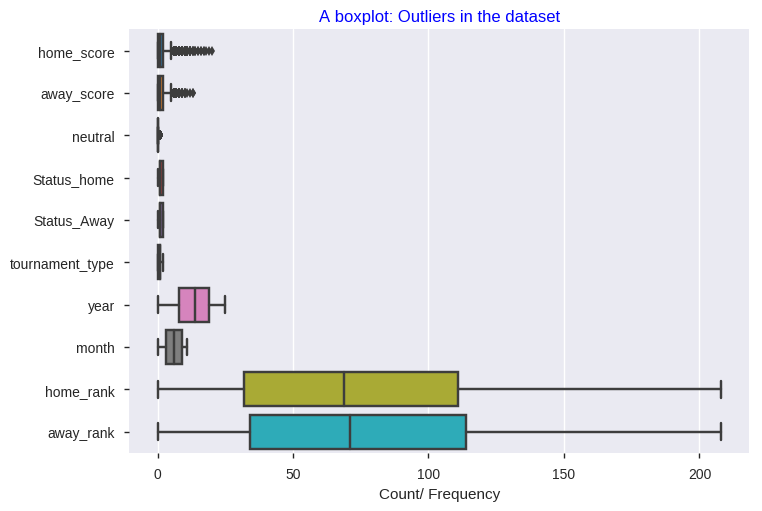

In [66]:
# checking for outliers in our dataset
# Using boxplots
# Labeling the title of our chart
# Displaying chart 

plt.figure(dpi = 100)
ax = sns.boxplot(data = home_merged_encoded , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

The home and away score columns have a profusion of outliers.

We will not remove them in this stage, to find out if they have an effect in our model.



## Distribution of the Home & Away Scores


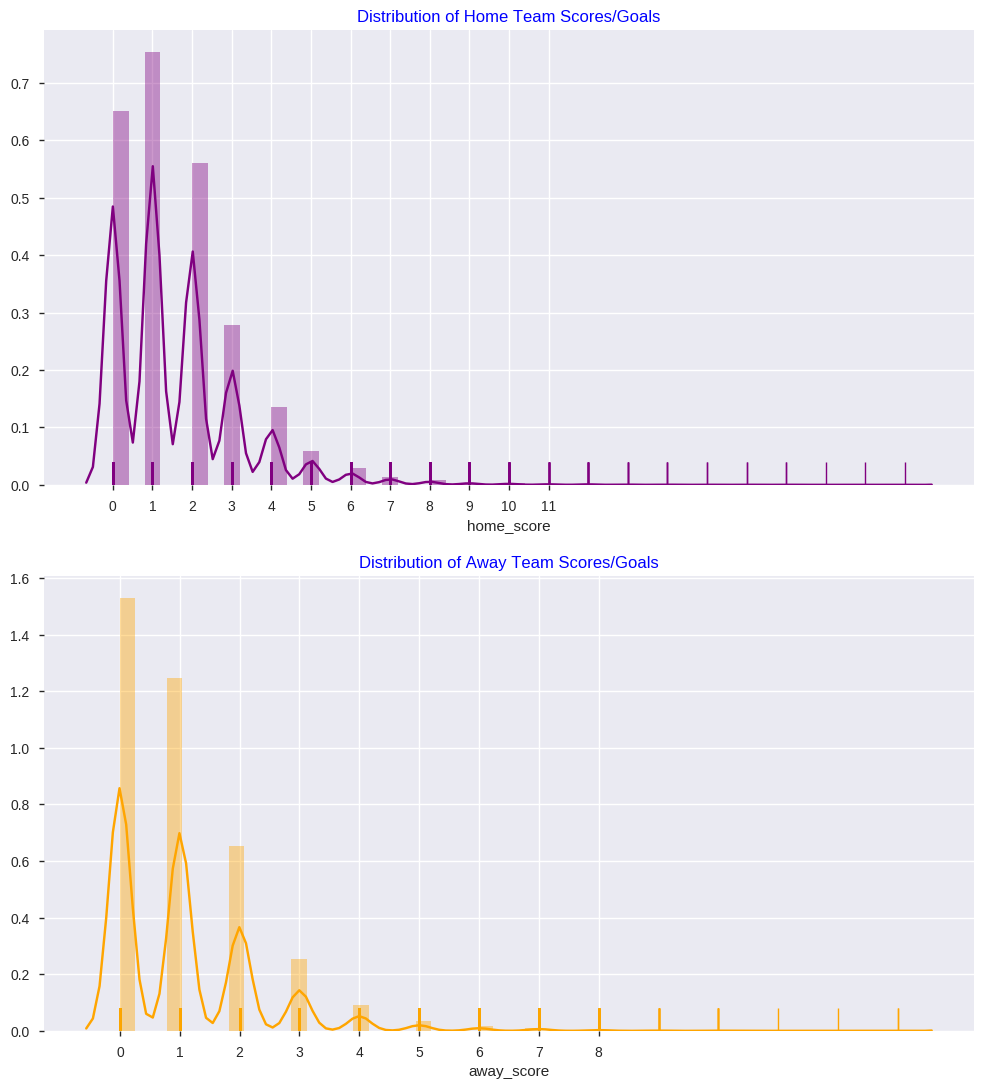

In [67]:
# Creating histograms to show the distribution of the goals for home teams and away teams
# Specifying the figure size
# Using seaborn for plotting
# Specifying the bins in the x axis
# Labeling title


plt.figure(figsize=(12,13), dpi = 100)
plt.subplot(211)
sns.distplot(home_merged_encoded["home_score"],color="purple",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Scores/Goals",color='b')


plt.subplot(212)
sns.distplot(home_merged_encoded["away_score"],color="orange",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Scores/Goals",color='b')
plt.show()

The histograms show that the home teams are highly likely to score at most one goal compared to the away team.

The charts also show that the goals scored in both home and away team is skewed to the right.

This means that there is a high probability of scoring more goals.

i.e. the outliers lie on the positive side.



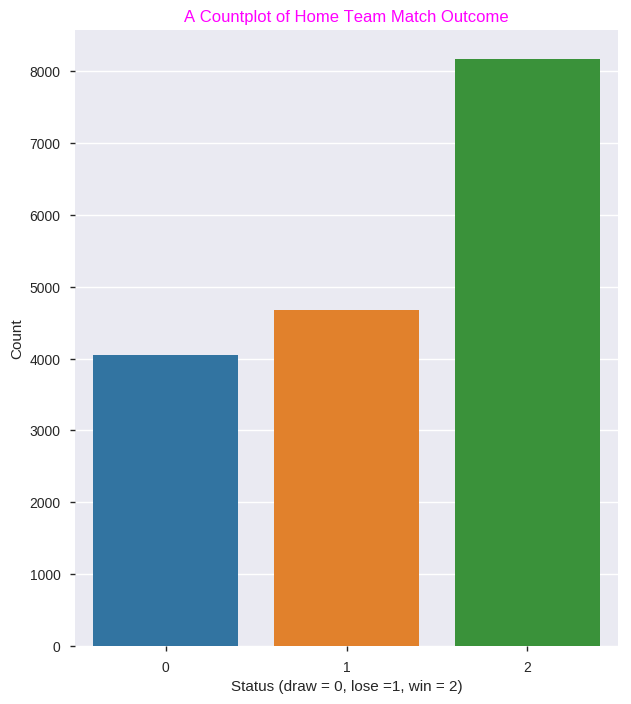

In [68]:
# The Home team Match outcome(draw = 0, lose =1, win = 2)
# Using a countplot to visualize these results
# Using Seaborn
# Labeling the x and y axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(home_merged_encoded['Status_home'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Home Team Match Outcome', color = 'magenta')
plt.show()

The bar chart above shows that in most cases the home team wins the match.

The home team is less likely to lose or draw in match.



# 1.7 Multicollinearity
 * Checking for multicollinearity
 * Solving multicollinearity

In [69]:
# Before we build a model we shall check if
# the independent variables are collinear/ correlated to each other

# Getting the pearson correation coefficient for each of the variables

correlation = home_merged_encoded.corr()
correlation

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
home_score,1.000000,-0.164630,-0.042069,0.522603,-0.109024,0.050670,-0.038744,0.019612,-0.135755,0.320343
away_score,-0.164630,1.000000,0.100251,-0.241832,0.468678,0.034421,-0.008379,0.018170,0.221477,-0.180634
neutral,-0.042069,0.100251,1.000000,-0.045219,0.047965,0.126197,0.042915,-0.105011,0.037090,0.047561
Status_home,0.522603,-0.241832,-0.045219,1.000000,0.394717,0.045661,-0.018907,0.011666,-0.115259,0.214090
Status_Away,-0.109024,0.468678,0.047965,0.394717,1.000000,0.061724,0.004347,0.002941,0.133551,-0.088224
tournament_type,0.050670,0.034421,0.126197,0.045661,0.061724,1.000000,-0.020240,0.122963,0.069106,0.069350
year,-0.038744,-0.008379,0.042915,-0.018907,0.004347,-0.020240,1.000000,-0.002137,0.104167,0.105806
month,0.019612,0.018170,-0.105011,0.011666,0.002941,0.122963,-0.002137,1.000000,0.029475,0.030676
home_rank,-0.135755,0.221477,0.037090,-0.115259,0.133551,0.069106,0.104167,0.029475,1.000000,0.469742
away_rank,0.320343,-0.180634,0.047561,0.214090,-0.088224,0.069350,0.105806,0.030676,0.469742,1.000000


The correlation matrix indicates that most variables are moderately or weakly correlated.

This is very beneficial when creating a model, as collinear variables reduce the power of the model to identify independent 
variables that are statistically significant. 

We aim to create a model with the most significant variables.

We will use the correlation matrix to calculate the vif (Variance Inflation Factor).

The VIF will help in determining the variables that are collinear or highly correlated with each other.

In [70]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
home_score,1.967705,-0.662885,0.056782,-1.414937,0.988514,-0.068438,0.054304,0.007171,0.367640,-0.536562
away_score,-0.662885,2.041059,-0.115694,1.294157,-1.456402,0.016108,0.028131,-0.049020,-0.359890,0.347448
neutral,0.056782,-0.115694,1.053092,0.032235,-0.013146,-0.145710,-0.040337,0.130747,0.065400,-0.117595
Status_home,-1.414937,1.294157,0.032235,2.891898,-1.950728,0.014380,0.018112,-0.021938,0.208399,-0.205861
Status_Away,0.988514,-1.456402,-0.013146,-1.950728,2.604401,-0.072525,-0.020762,0.030166,-0.184987,0.161485
tournament_type,-0.068438,0.016108,-0.145710,0.014380,-0.072525,1.048637,0.033620,-0.140691,-0.057224,-0.022798
year,0.054304,0.028131,-0.040337,0.018112,-0.020762,0.033620,1.021470,-0.003228,-0.053571,-0.101251
month,0.007171,-0.049020,0.130747,-0.021938,0.030166,-0.140691,-0.003228,1.033008,-0.006571,-0.028516
home_rank,0.367640,-0.359890,0.065400,0.208399,-0.184987,-0.057224,-0.053571,-0.006571,1.664181,-1.018724
away_rank,-0.536562,0.347448,-0.117595,-0.205861,0.161485,-0.022798,-0.101251,-0.028516,-1.018724,1.790264


We check VIFs along the diagonal.

VIFs Values greater than 5 indicate that the presence of multicollinearity.

If present we remove the variable with the greatest VIF value.

From the correlation matrix there are no correlated independent variables as all have VIF values are below 5, which is the threshold.

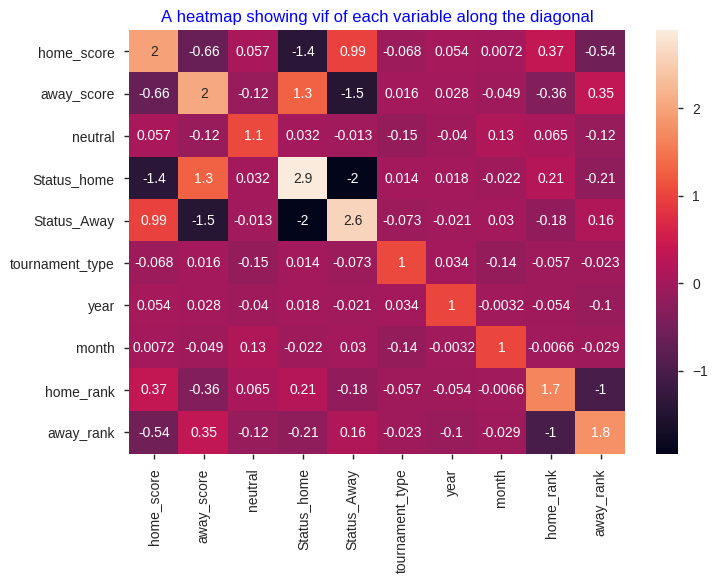

In [71]:
# Plotting a heat map to show the vif visually.
# Using the seaborn library for visualization
# Labeling the title
# Displaying the chart

vif = np.linalg.inv(correlation.values)
sns.heatmap(vif, annot = True, xticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'], yticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'blue' )
plt.show()


The heat map shows VIFs along the diagonal.

VIFs Values greater than 5 indicate that the presence of multicollinearity.

If present we remove the variable with the greatest VIF value.

There are no correlated independent variables as all have VIF values are below 5, which is the threshold.

# 1.8 Building a Model

## 1.8.1 Polynomial Regression Model

In [0]:
# Approach 1: Polynomial approach

# What to train given:

# Rank of home team
# Rank of away team
# Tournament type

# Model 1: Predict how many goals the home team scores

# Model 2: Predict how many goals the away team scores

### Model 1

Predict how many goals the home team scores

In [73]:
# Viewing our dataset before splitting 

home_merged_encoded.head(2)

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4


In [0]:
# Model 1
# Predict how many goals the home team scores given home rank
# Splitting the dataset into the features and target variable


X = home_merged_encoded['home_rank'].values.reshape(-1, 1)

y = home_merged_encoded['home_score'].values.reshape(-1, 1)

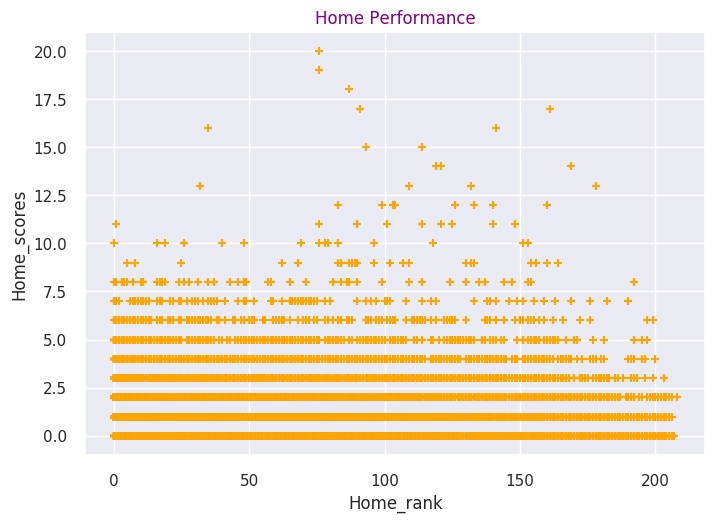

In [75]:
# Visualizing the dependent vs independent variable by plotting a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '+' , color = 'orange') 
plt.title('Home Performance', color = 'purple')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()


The chart above shows that there is no particular observable trend but,

There are more points on the lower side of the scatter plot.

Indicating in most cases the home team scores between 0 and 5 goals.

In [0]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [77]:
# Fit Linear Regression model to the dataset
# This is for comparing the linear regression model to the polynomial regression model)

reg_line = LinearRegression()
reg_line.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

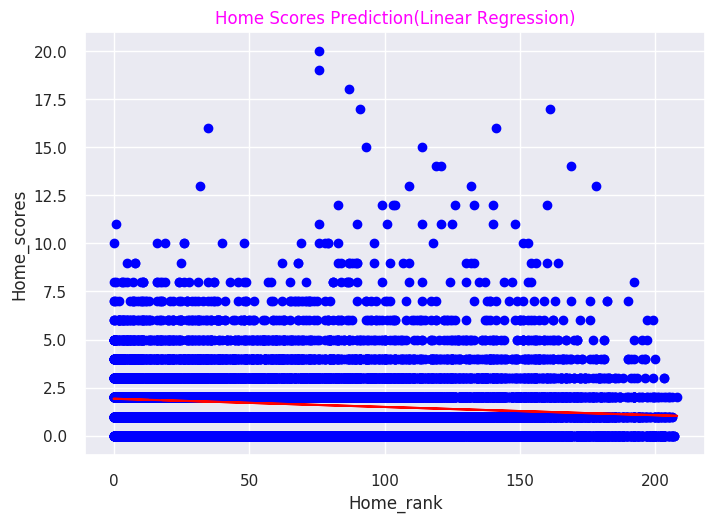

In [78]:
# Visualize the Linear Regression results
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(X, y, color='blue')
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home Scores Prediction(Linear Regression)', color = 'magenta')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

The home scores prediction chart above shows the line of best fit does not pass through a majority of the points.

This is also known as underfitting.

Therefore, the Linear regression model is not a good fit for this prediction.

We will fit a polynomial regression and evaluate the results.


In [0]:
# Fitting the polynomial features to the X the independent variable
# We will start  with a polynomial regression of degree 2

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [80]:
# Fitting a polynomial Regression to the dataset.

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

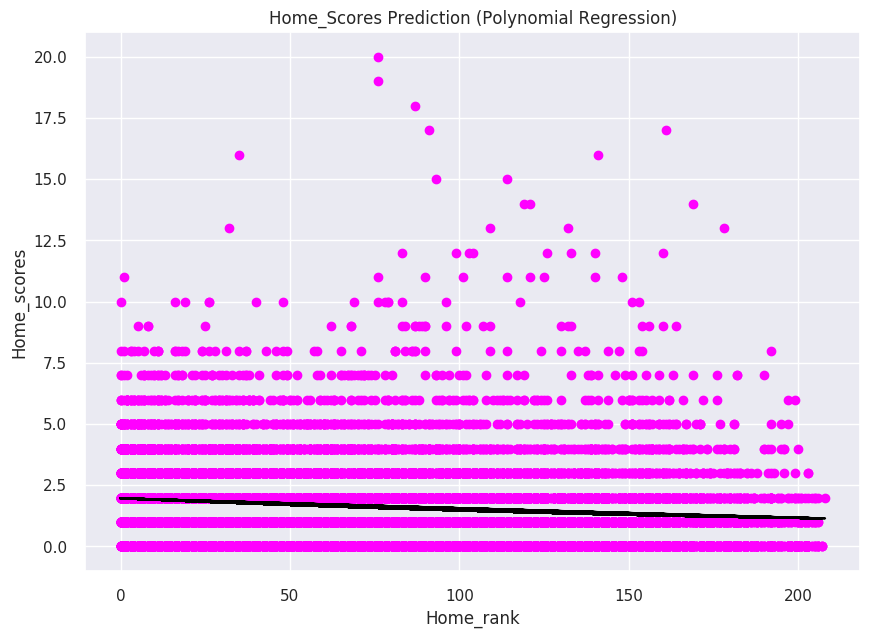

In [81]:
# Visualizing the polynomial Regression results
# Specifying the chart size
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.figure(figsize = (10,7))
plt.scatter(X, y, color='magenta')
plt.plot(X, pol_reg.predict(X_poly), color='black')
plt.title('Home_Scores Prediction (Polynomial Regression)')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()


Using the polynomial regression model of degree 2,

it is still not easy to draw meaningful conclusion from it.

The curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.

In [0]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [83]:
# Evaluation our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.5880578998328967
r2_score:  0.018694481014556508


Root Mean Square Error (RMSE), is the standard deviation of the residuals (predicted errors).

Residuals are a measure of how far from the regression line data points are;

It tells you how concentrated the data is around the line of best fit.

Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

The lower the value the better.


In [84]:
# Mean of the actual scores

np.mean(y) 

1.6026635099141757

In [85]:
# Ten percent of the mean

1.6026635099141757 * 0.1

0.1602663509914176

* Comparing the RMSE score = 1.59 with the 10% of actual scores mean = 0.16, it is above the actual scores mean.

* This means that the model is not efficient to use for predicting the home team scores.

* Hence we should try a model with more degrees to improve its efficiency.



### Model 2 

Predict how many goals the away team scores



In [0]:
# Model 2: Predict how many goals the away team scores given the away team rank

#
X = home_merged_encoded['away_rank'].values.reshape(-1, 1)

y = home_merged_encoded['away_score'].values.reshape(-1, 1)



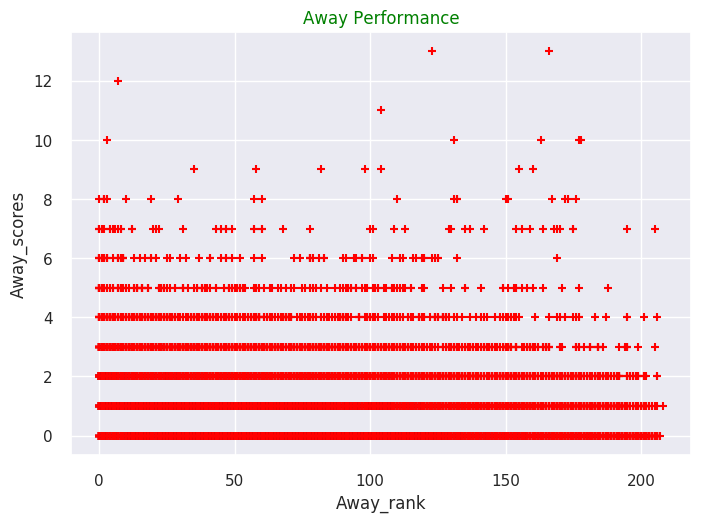

In [87]:
# Visualizing the dependent vs independent variable using a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '+' , color = 'red') 
plt.title('Away Performance', color = 'green')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

# There is no particular observable trend but
# there are more points on the lower side of the scatter plot

The chart above shows that there is no particular observable trend but,

There are more points on the lower side of the scatter plot.

Indicating in most cases the away team scores between 0 and 4 goals.

In [0]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [0]:
# Fitting the polynomial features to the X

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [90]:
# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

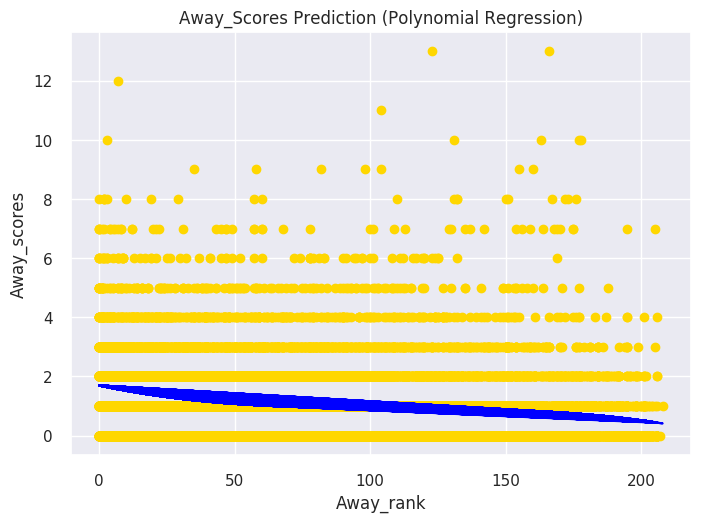

In [91]:
 # Visualizing the polynomial Regression results using a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(X, y, color='gold')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Away_Scores Prediction (Polynomial Regression)')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()

Using the polynomial regression model of degree 3,

it is still not easy to draw meaningful conclusion from it.

The curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.

This is underfitting.

The polynomial regression is not a good model to predict how many goals the away team scores given the away team rank.

In [0]:
# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [93]:
# Evaluating our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.2165654223317743
r2_score:  0.04008131109627655


In [94]:
# Calculating the Mean of the actual scores 
# We will compare 10% of this mean with the RMSE

np.mean(y)

1.0687185557857355

Comparing the RMSE = 1.2 with 10% of the actual mean = 0.1

The RMSE is very high

Therefore this is not a good model to use for predicting the away score

## 1.8.2 Logistic Regression Model

- Logistic regression is a predictive analysis. 

- Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
- Logistic Regression is used when the dependent variable(target) is categorical.
- In this model, we will be predicting whether the home team (Wins, Losses or Draws) in a match.


In [96]:
# Viewing the first two observations before splittig our dataset

home_merged_encoded.head(2)

,home_score,away_score,neutral,Status_home,Status_Away,tournament_type,year,month,home_rank,away_rank
17910,0,0,0,0,0,1,0,7,18,66
17911,0,1,0,1,2,1,0,7,69,4


### Model 3

In [0]:
# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [98]:
# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [100]:
# Evalauting the model

# Getting the accuracy score of our model

print(accuracy_score(y_test, y_pred))

0.5880437999408109


The model can correctly predict if home team will (won, lost or drew) in a match with an accuracy of 58.8%

## 1.8.3 Ridge Regression Model

- Regularization is the process of penalizing coefficients of variables either by removing them and or reducing their impact. 

There are three regularization parts:

        - L1 Regularization, also known as Lasso

        - L2 Regularization, also know as Ridge

        - The L1/L2 Regularization, also known as Elastic Net


- Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

- Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

-The difference between lasso and ridge regression is that some of the coefficients can be shrunk to zero i.e. 

- Some of the features are completely neglected in Lasso, 

- Whereas in Ridge the coefficients are shrunk close to zero but never removes them completely.

- This is beneficial as it helps in feature selection of the most significant co-efficients.

- Ridge regression reduces the effect of problematic variables close to zero but never fully removes them. 
 
- Regularization favors simpler models to more complex models to prevent your model from overfitting to the data.

- In the model, regularization address; variance-bias tradeoff, multicollinearity, sparse data handling(i.e. the situation where there are more observations than features), feature selection, and an easier interpretation of the output.


* https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58

### Model 4

 Predicting the rank of the teams

In [0]:
# Predict the rank of the teams and compare the models

In [141]:
# Previewing the first five observations of our ranking dataset

rank2.head()

,rank,home_team,previous_points,rank_change,year,month
0,1,Germany,57,0,1993,8
1,2,Italy,57,0,1993,8
2,3,Switzerland,50,9,1993,8
3,4,Sweden,55,0,1993,8
4,5,Argentina,51,5,1993,8


In [142]:
# Viewing the columns in the ranking dataset

rank2.columns

Index(['rank', 'home_team', 'previous_points', 'rank_change', 'year', 'month'], dtype='object')

In [147]:
# Checking the data types before we create a model

rank2.dtypes

rank                int64
home_team          object
previous_points     int64
rank_change         int64
year                int64
month               int64
dtype: object

In [0]:
# Converting the home team column to category data type 

rank2['home_team'] = rank2['home_team'].astype('category')

In [151]:
# Confirming the changes

rank2.dtypes

rank                  int64
home_team          category
previous_points       int64
rank_change           int64
year                  int64
month                 int64
dtype: object

In [0]:
# Splitting the data into independent and dependent variables

X = rank2.drop('rank', axis = 1)

y = rank2['rank']

In [0]:
# Getting dummies from our independent variables X
X=pd.get_dummies(X)

In [182]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid.
# we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# The metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
print(search.best_params_)
{'alpha': 0.01}
print(abs(search.best_score_)) 


{'alpha': 1e-05}
454.288975895421


The best_params_ tells us what to set alpha to which in this case is 1e-05.

The best_score_ tells us what the best possible mean squared error is. 

In this case, the value is 454.288975895421.

We shalll compare this with that of Lasso and Elastic Net to determine the best model.

In [161]:
# Calculating 10% of the actual mean


0.1*(np.mean(y))

10.162808644645546

In [162]:
# Calculating RMSE from Mean Squared Error 

np.sqrt(454.288975895421)

21.314055829321198

Comparing the ten percent of the actual mean (10.16) with the RMSE (21.31), the RMSE is quite high indicating that Ridge is not a good model to predict rank.

In [192]:
# Creating a dictionary to store coefficients of the model
# Using a for loop
# Printing the coefficients

coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,rank2.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'home_team': -3.284604145348829,
 'month': -1.2525706303939486,
 'previous_points': 6.715498693180713,
 'rank': -14.787758059730978,
 'rank_change': -0.09726516421204559,
 'year': 3.1436318537484893}

The Ridge penalization term shrunk some co-efficients close to zero compared to others.

We will compare these co-efficients with those from Lasso model.

## 1.8.4 Lasso Regression Model

Lasso stands for Least Absolute Shrinkage Selector Operator.

Lasso is a regularization technique. Use lasso to:

* Reduce the number of predictors in a regression model.

* Identify important predictors.

* Select among redundant predictors.

* Produce shrinkage estimates with potentially lower predictive errors than ordinary least squares.



### Model 5

In [185]:
# Using grid search to find the best parameters to use in Lasso regression model

# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.

X = rank2.drop('rank', axis = 1)

y = rank2['rank']

# Converting string categorical data into  0s and 1s which the model will understand.

X = pd.get_dummies(X)


# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting model and print the best parameter, R-squared score, MSE, and coefficients

gridlasso.fit(X_train, y_train) 

print("lasso best parameters:", gridlasso.best_params_) 

print("lasso score:", gridlasso.score(X_test, y_test))

print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 0.1}
lasso score: 0.8950263930041156
lasso MSE: 358.44045879891496
lasso best estimator coef: [-1.67998148e+01 -3.26199530e+00  7.46944124e+00 -6.61811689e-02
  3.15621460e+00 -1.07779720e+00 -2.29846950e+00  4.85664256e+00
  3.87373515e+00 -1.08117477e+00  5.25400993e+00  1.61567007e+00
 -4.23772335e+00 -4.68374650e-02  4.33536442e+00 -2.73520666e+00
 -2.70340042e+00  7.48545521e-01  4.22346129e+00 -0.00000000e+00
  3.06092307e+00  1.27267804e+00 -8.27289402e-01 -3.52174051e+00
  3.68672088e+00  5.91261049e-01  2.87274129e+00  4.37493883e+00
 -1.64535371e+00 -1.79492743e+00  1.38618442e+00 -4.21409351e+00
  4.34356349e+00  4.81380585e+00 -3.13750014e+00 -1.30970144e+00
  1.73031347e+00  4.16821364e+00 -3.40281513e+00 -1.19386702e+00
  8.53307325e-01  4.15982053e+00  3.23033172e+00  3.18892839e+00
 -3.38379075e+00 -1.60040540e+00  3.66242001e+00 -3.99403617e+00
  2.68318780e+00 -1.26750781e-01 -1.05689872e+00  4.74563822e+00
 -2.90167149e+00 -3.80574478

From the output, it is evident that some co-efficients were shrunk to zero.

This is very helpful in feature selection.

It provides an indication of the best parameters/ co-efficients to use in the prediction of rank.

The output also shows the best regularization L1 parameter to use which is lasso best parameters: {'alpha': 0.1}

The model accuracy is 89.5% which is good but

The MSE is 358.4 which is slightly large compared to that resulting from the Ridge model (345.115).

We expect the MSE to reduce, since it is the difference between the actual values and the predicted ones.


In [188]:
# Computing the Lasso RMSE from the MSE
np.sqrt(358.44045879891496)

18.932523835952644

In [190]:
# Computing 10% of the actual mean for comparison with the Lasso RMSE

0.1*(np.mean(y_test))

10.137331303204375

Comparing the RMSE (18.93), and actual mean (10.13), the RMSE is higher.

Comparing the Lasso RMSE (19.93), and the Ridge RMSE (21.31), the Lasso model is better compared with the Ridge model.

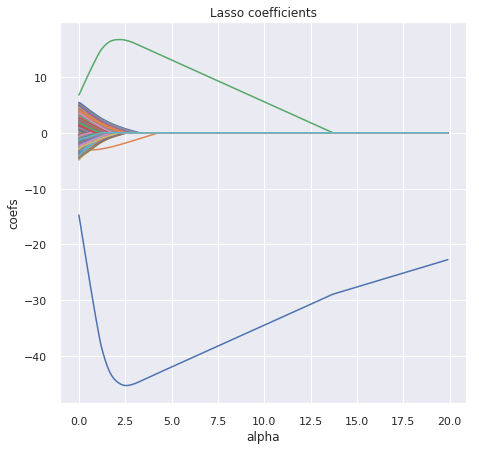

In [186]:
# Visualizing the effect of Lasso Regularization on co-efficients.
# Fist we create a list where we shall input the coefficients after building the model.

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# From the chart below, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

## 1.8.5 Elastic Net Regression Model

* Elastic Net is a mix of both L1 and L2 regularization. 
* In this case, we apply a penalty to the sum of the absolute values and to the sum of the squared values.
* Elastic net is a hybrid of ridge regression and lasso regularization. 
* Like lasso, elastic net can generate reduced models by generating zero-valued coefficients.
* Empirical studies have suggested that the elastic net technique can outperform lasso on data with highly correlated predictors.


### Model 6

In [0]:
# Splitting the data into predictor and target variables

X = rank2.drop('rank', axis = 1)

y = rank2['rank']

# Converting string categorical data into  0s and 1s which the model will understand.

X = pd.get_dummies(X)


In [194]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalized data. 
# This argument is set inside the ElasticNet function. 
# We will use grid search to find the best parameters.
# Just like in Ridge and Lasso

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


477.1983470781038

The Elastic Net Output indicates the best parameters to use in the model;

alpha = 1e-05,   and the  l1_ratio = 0.8.

The best MSE score is 477.1983470781038.

Comparing this with the Ridge (454.29), and Lasso (358.4), it is actually above the others.

This means that Elastic is still not a good model in predicting rank, despite the fact that it combines the power of the L1 (Lasso) and L2 (Ridge) regularizations.



In [198]:
# Computing the RMSE from ELastic Net MSE

np.sqrt(477.1983470781038)

21.844870040311612

In [199]:
# computing the actual mean
0.1*(np.mean(y))

10.162808644645546

Comparing the RMSE (21.84), and actual mean (10.16), the RMSE is higher.

This shows that Elastic Net is not a good model in predicting the rank.

Comparing the Lasso RMSE (19.93), and the Ridge RMSE (21.31), the Lasso Regression performs best.

Though none is good at predicting the rank.


In [197]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are different depending on their significance in the model. 
#


{'home_team_Afghanistan': 48.31687279011532,
 'home_team_Albania': -15.523429050862866,
 'home_team_Algeria': -33.195016604642625,
 'home_team_American Samoa': 68.340809955854,
 'home_team_Andorra': 51.603901211731014,
 'home_team_Angola': -16.249837429946936,
 'home_team_Anguilla': 71.2124036606908,
 'home_team_Antigua and Barbuda': 20.83621933926942,
 'home_team_Argentina': -56.63413323860344,
 'home_team_Armenia': -4.350977458105834,
 'home_team_Aruba': 55.39377469417128,
 'home_team_Australia': -38.355323158374304,
 'home_team_Austria': -37.505637800431465,
 'home_team_Azerbaijan': 9.59269559808444,
 'home_team_Bahamas': 58.69710996990347,
 'home_team_Bahrain': -3.084183545162556,
 'home_team_Bangladesh': 38.54519788411835,
 'home_team_Barbados': 15.742719136557918,
 'home_team_Belarus': -13.67079628756297,
 'home_team_Belgium': -47.59591884198792,
 'home_team_Belize': 48.612733618246466,
 'home_team_Benin': 8.233587822475368,
 'home_team_Bermuda': 36.13998221370414,
 'home_team_Bh

# 1.9 Cross-Validation (Logistic Regression Model)

In [103]:
# Using KFolds

# Splitting our dataset
# independet variables as X
# dependent variable as y

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1).values
y = home_merged_encoded.Status_home.values

# specifying the number of folds

folds = KFold(n_splits = 10)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
  LogReg = LogisticRegression()  
  LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
  y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  # printing each model RMSE
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  
 


Training model 1
Model 1 Root Mean Squared Error: 0.9291467104109317

Training model 2
Model 2 Root Mean Squared Error: 0.9527288741779099

Training model 3
Model 3 Root Mean Squared Error: 0.9545902804608352

Training model 4
Model 4 Root Mean Squared Error: 0.9696580254865798

Training model 5
Model 5 Root Mean Squared Error: 0.9373890466887647

Training model 6
Model 6 Root Mean Squared Error: 0.9220668214446279

Training model 7
Model 7 Root Mean Squared Error: 0.9671942783404326

Training model 8
Model 8 Root Mean Squared Error: 0.9439596382777465

Training model 9
Model 9 Root Mean Squared Error: 0.9542525802818357

Training model 10
Model 10 Root Mean Squared Error: 0.9751197342642436


In [104]:
# Printing the mean and the standard deviation of the RMSES in all the 10 models

print(np.mean(RMSES))
print(np.std(RMSES))
 

0.9506105989833907
0.01663309966328416


Since the standard deviation is low, the models are stable.
This is also visible in the plot below

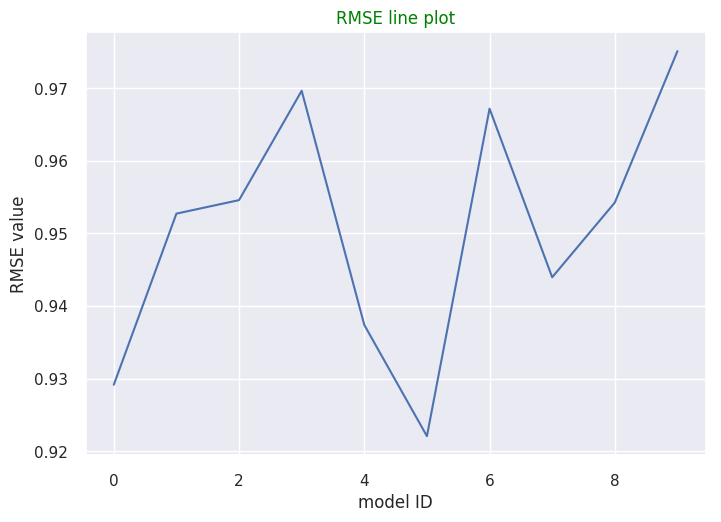

In [105]:
 # Visualizing the 10-folds RMSES using a scatter plot
# Using seaborn to plot
# Labeling y axis
# labeling the title
# Labeling the x axis.
# displaying the chart


plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.title("RMSE line plot", color = 'Green')
plt.xlabel('model ID')
plt.show()

# 2.1 Heteroskedasticity

-Heteroscedasticity is the condition in which the variance of error term or the residual term in a regression model varies. 

-One of the assumptions of the linear regression states that the error term should have a constant variance; homoscedasticity.

-If this is violated, then we have heteroscedasticity.

     - Possible Reasons for heteroscedasticity
 
- Often occurs in those data sets which have a large range between the largest and the smallest observed values i.e. when there are outliers.

- When model is not correctly specified.

- If observations are mixed with different measures of scale.

- When incorrect transformation of data is used to perform the regression.

- Skewness in the distribution of a regressor, and may be some other sources.

    * Effects of heteroscedasticity

-As mentioned above that one of the assumptions of linear regression is that there is no heteroscedasticity. Breaking this assumption means that OLS (Ordinary Least Square) estimators are not the Best Linear Unbiased Estimator(BLUE) and their variance is not the lowest of all other unbiased estimators.

-Estimators are no longer best/efficient.

-The tests of hypothesis (like t-test, F-test) are no longer valid due to the inconsistency in the co-variance matrix of the estimated regression coefficients.



In [0]:
# Checking heteroskedasticity in the logistic model we created

In [107]:
# First: splitting our dataset 
# Into the feature set and the target variable

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting a Logistic model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

0.437999408108908

The mean is 0.43 indicating that we tend to be fairly correct, although slightly over estimating the home team perfomance by, on average, 43.8%



## 2.1.1 Residual Plots

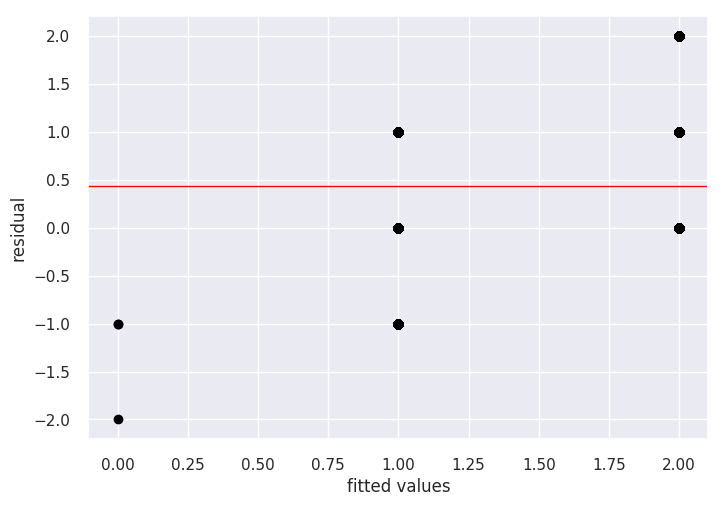

In [108]:
# Visualizing the residuals using a scatter plot 
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

From the plot we can see that there is a constant variance.

Hence the homoscedasticity assumption is not violated.

We can confirm these using barletts test.


## 2.1.2 Barlett's test

In [109]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

3.01926898623592e-247
The variances are Homogeneous!


# 2.2 Challenging the solution (Home and Away Scores Models)

In [0]:
# Using Hyperparameter Tuning

# Splitting the dataset into independent variables and target variable

X = home_merged_encoded.drop(['Status_Away', 'Status_home', 'home_score', 'away_score'], axis = 1)
y = home_merged_encoded.Status_home


In [0]:
# Creating the logistic Regression

logistic = LogisticRegression()


In [0]:
# Creating regularization penalty space    
#  penalty term is a constraint region or a budget 
# Regulization helps to select the preferred model complexity 
# so that the model is better at predicting

# L1: uses absolute values in the penalty function
# L2: minimizes the sum of errors

penalty = ['l1', 'l2']

# Creating regularization hyperparameter space

C = np.logspace(0, 4, 10)

# Creating hyperparameters options

hyperparameters = dict(C=C, penalty = penalty)

In [0]:
# Creating grid search using 10-fold cross validation

clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

In [0]:
# Fitting grid search
best_model = clf.fit(X, y)

In [115]:
# Finding out the best hyperparameters available to tune the Logistic Regression model
best_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [116]:
# Viewing best hyperparameters

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
best_model.best_score_

Best Penalty: l2
Best C: 2.7825594022071245


0.5801124593074874

In [117]:
# Predicting target vector

best_model.predict(X)

array([2, 1, 2, ..., 1, 1, 1])

In [118]:
# Using XGBOOST 

# Tunning the parameters

import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X, y)

predictions = gbm.predict(X_test)

print(accuracy_score(y_test, predictions))


0.5945546019532406


# 2.3 Conclusion
 **** 1. Predicting whether home team wins, loses or draws in a match
 
* The best accuracy score using two hyperparameters is 58%
* Using XGboost algorithm the accuracy score was 59%
* Therefore, another algorithm can be considered to improve the accuracy score or more hyperparameters should be tuned 

*****2. Predicting the rank of a team
 
 * None of the three regularized regression models is a good fit to predict the rank; they all have RMSE scores greater than the mean of the actual.
 
 * Comparison: Elastic Net RMSE(21.84),  Lasso RMSE (19.93),  Ridge RMSE (21.31) against the actual mean (10.16)

* Since this is also more of a classification problem, using regressions is not the best approach though this project was restrictive.

 
 